In [1]:
'''
            Analyzing Promotion Prediction Data
Objective
    The goal of this hackathon is to use data analysis and machine learning to predict promotion.
This means you'll determine identifying the right people for promotion, based on past data
'''

"\n            Analyzing Promotion Prediction Data\nObjective\n    The goal of this hackathon is to use data analysis and machine learning to predict promotion.\nThis means you'll determine identifying the right people for promotion, based on past data\n"

In [72]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import joblib
from imblearn.over_sampling import RandomOverSampler
import imblearn


In [3]:
# read the test and train data
train = pd.read_csv('../Data/train_LZdllcl.csv')
test  = pd.read_csv('../Data/test_2umaH9m.csv')

In [4]:
# total no.of rows and columns
train.shape, test.shape

((54808, 14), (23490, 13))

In [5]:
# to view the dataypes
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
# get all details of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
# to view the first two rows
train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [8]:
# checking missing data
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
train.isna().sum()/train.shape[0]*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [10]:
# percentage of missing data in each column
(train.isna().sum()/train.shape[0]*100).sort_values()

employee_id             0.000000
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
education               4.395344
previous_year_rating    7.524449
dtype: float64

In [11]:
# to check duplicates
train.duplicated().sum()

0

In [12]:
train.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [13]:
train['is_promoted'].value_counts(normalize=True)*100

is_promoted
0    91.482995
1     8.517005
Name: proportion, dtype: float64

In [14]:
# 91.483% of the employees not got the promotion
# only 8.517 employees got the promotion

<Axes: xlabel='is_promoted'>

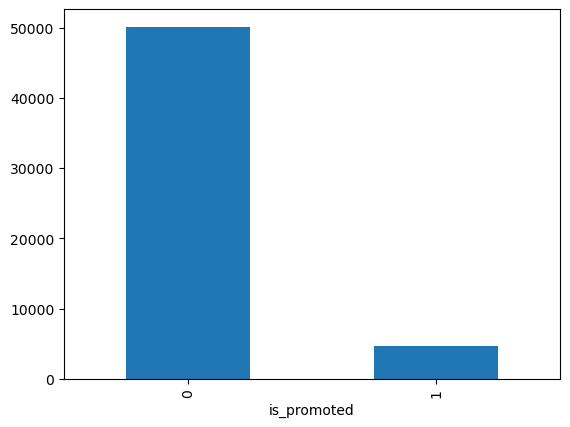

In [15]:
train['is_promoted'].value_counts().plot(kind='bar')

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [17]:
tgt_col = ['is_promoted']
ign_cols = ['employee_id']

In [18]:
train.drop(columns=ign_cols).describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [19]:
train.describe(include='object').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [20]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [22]:
# Droping employee ID
for col in train.drop(columns=ign_cols).columns:
    print(col,train[col].nunique(),  '=>', train[col].unique())

department 9 => ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region 34 => ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education 3 => ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender 2 => ['f' 'm']
recruitment_channel 3 => ['sourcing' 'other' 'referred']
no_of_trainings 10 => [ 1  2  3  4  7  5  6  8 10  9]
age 41 => [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating 5 => [ 5.  3.  1.  4. nan  2.]
length_of_service 35 => [ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17

In [23]:
# Replacing nan with 0 in previous year rating - i.e freshers
train['previous_year_rating'] = train['previous_year_rating'].fillna(0)

In [26]:
for col in train.columns:
    print(col,train[col].nunique(),  '=>', train[col].unique())

employee_id 54808 => [65438 65141  7513 ... 13918 13614 51526]
department 9 => ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region 34 => ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education 4 => ["Master's & above" "Bachelor's" 'unschooled' 'Below Secondary']
gender 2 => ['f' 'm']
recruitment_channel 3 => ['sourcing' 'other' 'referred']
no_of_trainings 10 => [ 1  2  3  4  7  5  6  8 10  9]
age 41 => [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating 6 => [5. 3. 1. 4. 0. 2.]
len

In [25]:
# 4.39% education contains nan. We can replace this with unschooled
train['education'] = train['education'].fillna('unschooled')

<Axes: xlabel='no_of_trainings', ylabel='Density'>

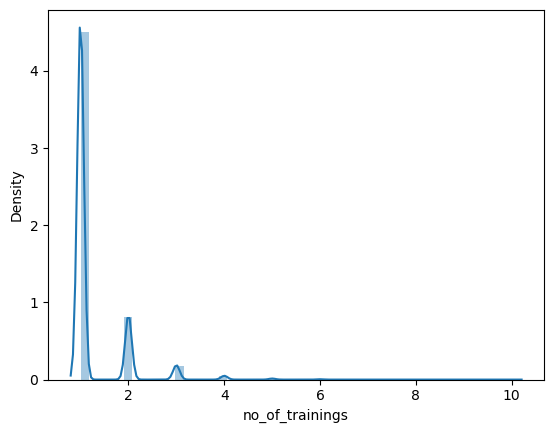

In [28]:
sns.distplot(train.no_of_trainings)

<Axes: xlabel='avg_training_score', ylabel='Density'>

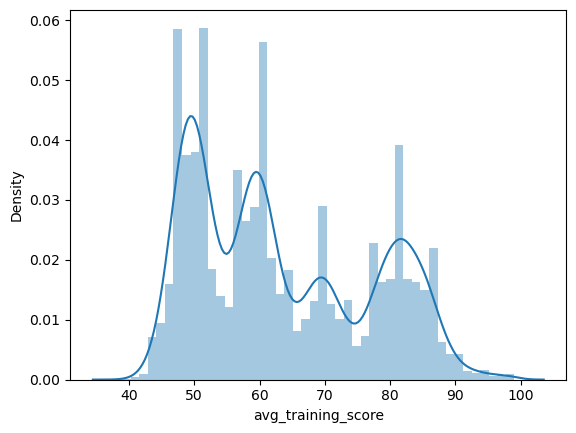

In [30]:
#Most of them taking single training 
sns.distplot(train.avg_training_score )

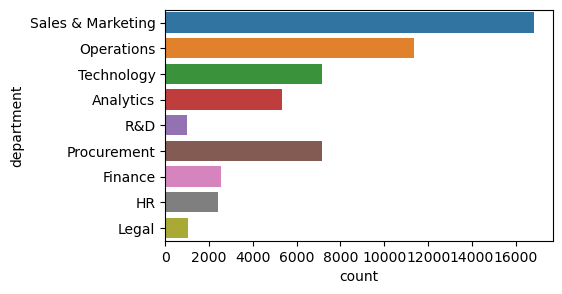

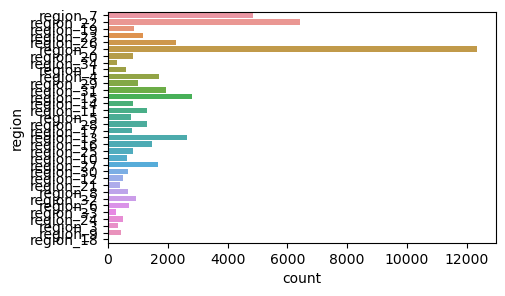

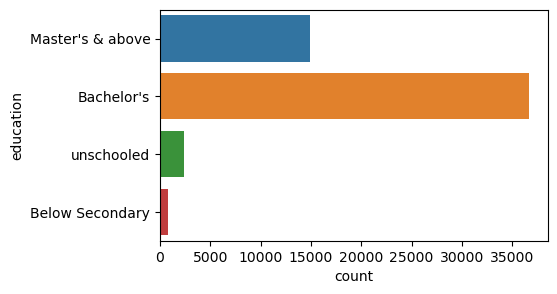

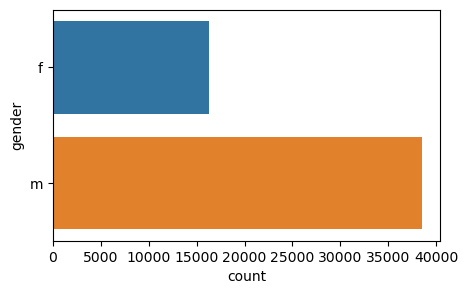

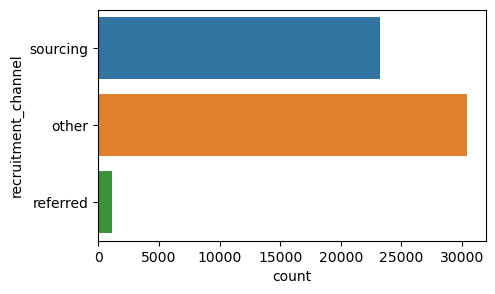

In [31]:
for col in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(5,3))
    sns.countplot(y=train[col])
    plt.show()

In [ ]:
#HR and Leagal Dept having less strength
#43.08% of employees belongs to Region 2,22 and7
#More employees recruitment thru other channel
# 29.76 % are female and above 70% are male
# UG categories are high


<Axes: ylabel='is_promoted,avg_training_score'>

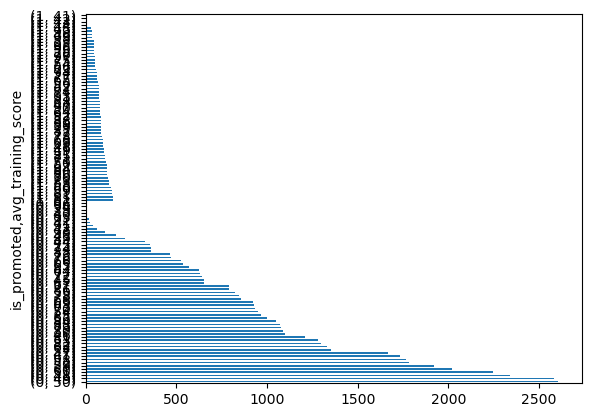

In [33]:
train[['avg_training_score','is_promoted']].groupby('is_promoted').value_counts().plot(kind='barh')

<Axes: ylabel='KPIs_met >80%,is_promoted'>

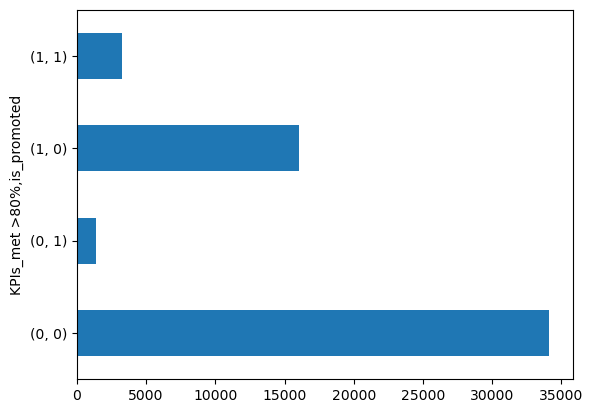

In [34]:
train[['KPIs_met >80%','is_promoted']].groupby('KPIs_met >80%').value_counts().plot(kind='barh')

<Axes: xlabel='previous_year_rating,is_promoted'>

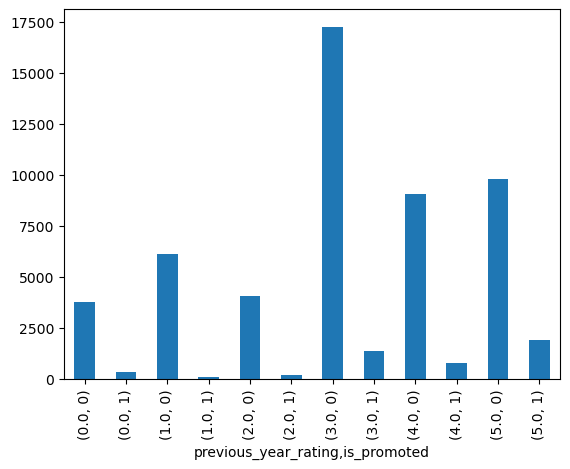

In [35]:
# only 16.9% with Employee's KPI above >80 will got promotion.
train[['previous_year_rating','is_promoted']].groupby('previous_year_rating').value_counts().plot(kind='bar')

In [36]:
# previous yr rating 5 will getting more promotion
exp_tgt = train[['length_of_service','is_promoted']].groupby('length_of_service').value_counts().unstack()
exp_tgt['%'] = exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)

is_promoted,0,1,%
length_of_service,,,
34,3.0,1.0,25.000000
32,8.0,2.0,20.000000
23,58.0,7.0,10.769231
11,820.0,96.0,10.480349
29,27.0,3.0,10.000000
22,55.0,6.0,9.836066
19,297.0,32.0,9.726444
8,2614.0,269.0,9.330558
10,1989.0,204.0,9.302326


In [ ]:
#Employee with 34yrs of service got 25% of promotion

In [37]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [38]:
cat_cols = ['department','region','education','gender','recruitment_channel']
num_cols = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']

In [39]:
print(tgt_col, ign_cols, cat_cols, num_cols, sep='\n')

['is_promoted']
['employee_id']
['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']


In [40]:
cat_pipe_encode = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # categetoy encoding
])

In [41]:
num_pipe_encode = Pipeline(
steps = [
    ('impute_num', SimpleImputer(strategy='median')), # missing values
    ('scale',StandardScaler()) # standard scaler
])

In [42]:
preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ]
)

In [43]:
model_pipeline = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])

In [44]:
X = train.drop(columns=ign_cols+tgt_col)
X.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60


In [45]:
y = train[tgt_col]
y.head(2)

,is_promoted
0,0
1,0


In [46]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.1)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((49327, 12), (5481, 12), (49327, 1), (5481, 1))

In [47]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [48]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [49]:
model_pipeline.predict_proba(val_X)

array([[0.99451187, 0.00548813],
       [0.98246063, 0.01753937],
       [0.95742303, 0.04257697],
       ...,
       [0.93959239, 0.06040761],
       [0.95290112, 0.04709888],
       [0.97669398, 0.02330602]])

In [50]:
model_pipeline.predict_proba(val_X)[:,0]

array([0.99451187, 0.98246063, 0.95742303, ..., 0.93959239, 0.95290112,
       0.97669398])

In [51]:
model_pipeline.predict_proba(val_X)[:,1]

array([0.00548813, 0.01753937, 0.04257697, ..., 0.06040761, 0.04709888,
       0.02330602])

In [52]:
model_pipeline.predict(val_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()
  

Train AUC
0.6289025442153221
Valid AUC
0.6303413659231352
Train cnf_matrix
[[44838   252]
 [ 3121  1116]]
Valid cnf_matrix
[[5019   31]
 [ 316  115]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     45090
           1       0.82      0.26      0.40      4237

    accuracy                           0.93     49327
   macro avg       0.88      0.63      0.68     49327
weighted avg       0.92      0.93      0.92     49327

Valid cls rep
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5050
           1       0.79      0.27      0.40       431

    accuracy                           0.94      5481
   macro avg       0.86      0.63      0.68      5481
weighted avg       0.93      0.94      0.92      5481



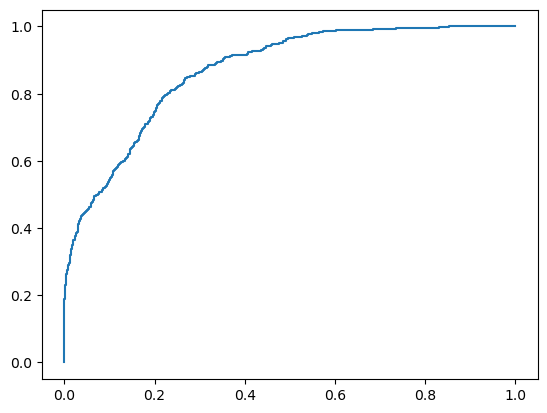

In [54]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [59]:
params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }    
]

In [60]:
grid = GridSearchCV(estimator=model_pipeline, param_grid=params, 
                    cv=2, scoring='roc_auc')

In [61]:
grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=0.5)],
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [64]:
grid.best_params_
'''A value below 0.5 indicates a poor model. A value of 0.5 indicates that the model is no better out classifying outcomes than random chance.'''

{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}

In [63]:
res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}",0.872957,1
1,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': None}",0.869788,3
2,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': 'l2'}",0.870486,2
3,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': None}",0.869788,3


In [65]:
# read the submission file
# predict with the last model
#upload into the Analytic Vidya website

sub = pd.read_csv('../Data/sample_submission_M0L0uXE.csv')
sub.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


In [66]:
test.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47


In [67]:
train.columns.difference(test.columns)

Index(['is_promoted'], dtype='object')

In [68]:
# updating the existing promoted values with predicted values
sub['is_promoted'] = model_pipeline.predict(test)

In [69]:
sub.to_csv('sub_1.csv',index=False)

In [70]:
sub

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [73]:
joblib.dump(model_pipeline,'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

In [74]:
from imblearn.over_sampling import RandomOverSampler

In [75]:
over_sampling = RandomOverSampler()

In [76]:
train_y.value_counts()

is_promoted
0              45090
1               4237
Name: count, dtype: int64

In [77]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [78]:
train_y_os.value_counts()

is_promoted
0              45090
1              45090
Name: count, dtype: int64

In [79]:
params_2 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    }
]


In [80]:
params_2

[{'model': [LogisticRegression()],
  'model__penalty': ['l2', None],
  'model__C': [0.5, 3]},
 {'model': [DecisionTreeClassifier()], 'model__max_depth': [3, 5]}]

In [81]:
grid_2 = GridSearchCV(estimator=model_pipeline, param_grid=params_2, 
                    cv=2, scoring='roc_auc')

In [82]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=0.5, penalty=None)],
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [84]:
grid_2.best_params_

{'model': LogisticRegression(C=0.5, penalty=None),
 'model__C': 0.5,
 'model__penalty': None}

In [85]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression(C=0.5, penalty=None))])

In [86]:
grid_2.cv_results_

{'mean_fit_time': array([0.43982661, 0.4467473 , 0.46208274, 0.46654105, 0.22792482,
        0.26952755]),
 'std_fit_time': array([0.03173363, 0.01268935, 0.03042901, 0.01497698, 0.039011  ,
        0.01411498]),
 'mean_score_time': array([0.08284628, 0.08010364, 0.07887292, 0.11284482, 0.0844754 ,
        0.08931005]),
 'std_score_time': array([4.23943996e-03, 1.30391121e-03, 5.69820404e-05, 1.25025511e-02,
        5.82325459e-03, 5.84638119e-03]),
 'param_model': masked_array(data=[LogisticRegression(C=0.5, penalty=None),
                    LogisticRegression(C=0.5, penalty=None),
                    LogisticRegression(C=0.5, penalty=None),
                    LogisticRegression(C=0.5, penalty=None),
                    DecisionTreeClassifier(), DecisionTreeClassifier()],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__C': masked_array(data=[0.5, 0.5, 3, 3, --, --],
              mask=[False, False, Fa

Train AUC
0.7920591905638805
Valid AUC
0.7971944131768165
Train cnf_matrix
[[34479 10611]
 [  765  3472]]
Valid cnf_matrix
[[3857 1193]
 [  73  358]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     45090
           1       0.25      0.82      0.38      4237

    accuracy                           0.77     49327
   macro avg       0.61      0.79      0.62     49327
weighted avg       0.92      0.77      0.82     49327

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      5050
           1       0.23      0.83      0.36       431

    accuracy                           0.77      5481
   macro avg       0.61      0.80      0.61      5481
weighted avg       0.92      0.77      0.82      5481



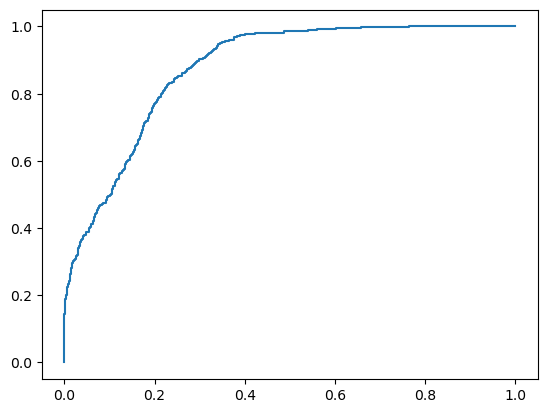

In [88]:
new_model = grid_2.best_estimator_
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

Train AUC
0.7914282546019072
Valid AUC
0.7971944131768165
Train cnf_matrix
[[34479 10611]
 [ 8198 36892]]
Valid cnf_matrix
[[3857 1193]
 [  73  358]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.81      0.76      0.79     45090
           1       0.78      0.82      0.80     45090

    accuracy                           0.79     90180
   macro avg       0.79      0.79      0.79     90180
weighted avg       0.79      0.79      0.79     90180

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      5050
           1       0.23      0.83      0.36       431

    accuracy                           0.77      5481
   macro avg       0.61      0.80      0.61      5481
weighted avg       0.92      0.77      0.82      5481



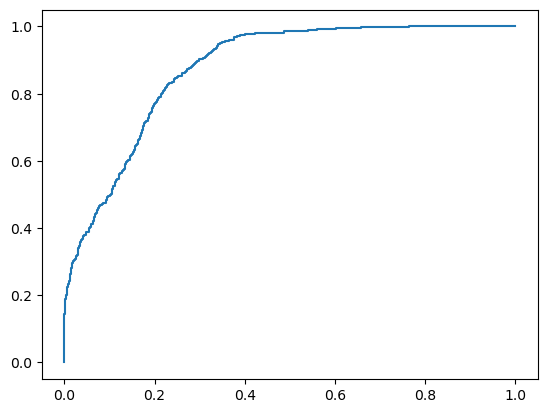

In [89]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,new_model)

In [90]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 0.5, 'model__penalty': 'l2'}",0.876066,4
1,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 0.5, 'model__penalty': None}",0.876372,1
2,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 3, 'model__penalty': 'l2'}",0.876327,3
3,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 3, 'model__penalty': None}",0.876372,1
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.798773,6
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.848421,5


In [91]:
sub['is_promoted'] = new_model.predict(test)
sub.to_csv('PromoPredictionsub_2.csv',index=False)